In [31]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import acquire
import summarize

### Acquire & Summarize

Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join. We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid
- only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property id's), along with zestimate error and date of transaction.
- only include properties that include a latitude and longitude value

In [32]:
query = """
    SELECT *
        FROM properties_2017
        JOIN predictions_2017 USING (parcelid)
        LEFT JOIN airconditioningtype USING (airconditioningtypeid)
        LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
        LEFT JOIN buildingclasstype USING (buildingclasstypeid)
        LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
        LEFT JOIN propertylandusetype USING (propertylandusetypeid)
        LEFT JOIN storytype USING (storytypeid)
        LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
        WHERE latitude is not null and longitude is not null
        """
db = "zillow"

In [33]:
df = acquire.get_data(query, db)

In [34]:
# keep max transaction dates
df = df.sort_values("transactiondate", ascending=False).drop_duplicates("parcelid")

In [35]:
# ensure all dates are from 2017
df = df [df.transactiondate.str.startswith("2017")]

In [36]:
# remove id codes that were used to join tables
df.drop(columns = ["typeconstructiontypeid","storytypeid","propertylandusetypeid", "heatingorsystemtypeid",\
                   "buildingclasstypeid","architecturalstyletypeid","airconditioningtypeid","id"], inplace=True)

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [37]:
df.shape

(77380, 60)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 77578 to 0
Data columns (total 60 columns):
parcelid                        77380 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77380 non-null float64
bedroomcnt                      77380 non-null float64
buildingqualitytypeid           49671 non-null float64
calculatedbathnbr               76771 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77184 non-null float64
finishedsquarefeet12            73748 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50            6023 non-null float64
finishedsquarefeet6             386 non-null float64
fips                            77380 non-null float64
fireplacecnt                    8276 non-null float64
fullbathcnt                

In [39]:
df.describe(include='all')

,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
count,7.738000e+04,50.000000,77380.000000,77380.000000,49671.000000,76771.000000,614.0,6023.000000,77184.000000,73748.000000,...,7.713600e+04,77380.000000,77380,24953,206,15,49439,77380,50,222
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,264,5,5,2,10,13,1,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-06-30,Central,Contemporary,Buildings having wood or wood and steel frames,Central,Single Family Residential,Basement,Frame
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1189,23133,172,14,33550,52319,50,219
mean,1.300715e+07,679.720000,2.299134,3.053489,6.534638,2.316871,66.0,1366.512535,1785.229465,1760.532177,...,6.049674e+13,0.016628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.481368e+06,689.703546,0.996657,1.139103,1.721933,0.979761,0.0,671.308125,954.051796,934.027008,...,1.535252e+12,0.170190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.071186e+07,38.000000,0.000000,0.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,...,6.037101e+13,-4.655420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.153830e+07,273.000000,2.000000,2.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,...,6.037311e+13,-0.024377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.253155e+07,515.000000,2.000000,3.000000,6.000000,2.000000,66.0,1257.000000,1543.000000,1523.000000,...,6.037603e+13,0.006627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.421184e+07,796.500000,3.000000,4.000000,8.000000,3.000000,66.0,1615.000000,2113.000000,2076.000000,...,6.059042e+13,0.039204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# df.set_index("parcelid", inplace=True)

In [41]:
# make some feature lists
features = list(df.columns)
features_num = list(df.select_dtypes(np.number).columns)
features_obj = list(df.select_dtypes(exclude=np.number).columns)

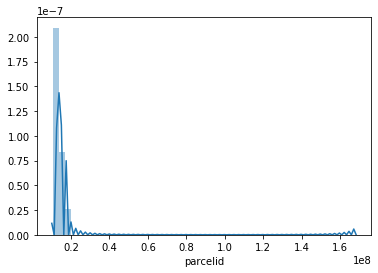

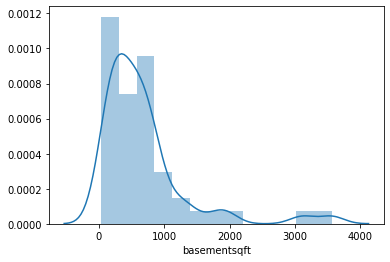

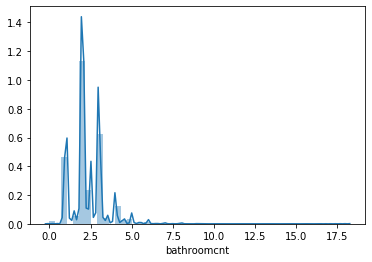

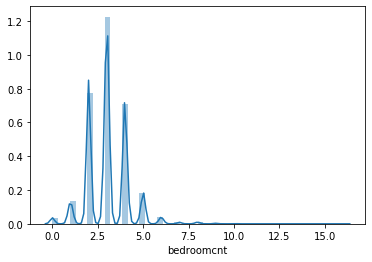

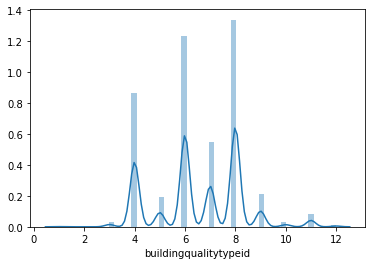

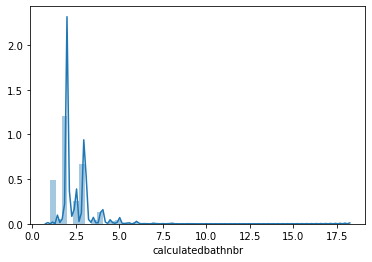

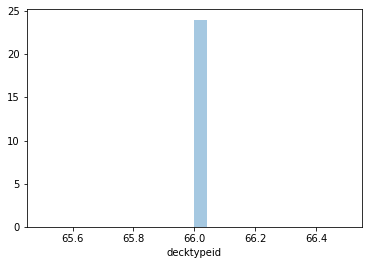

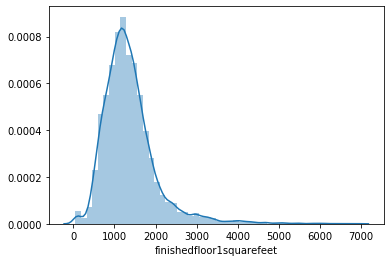

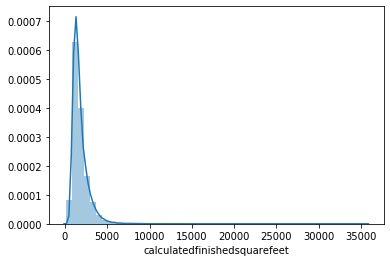

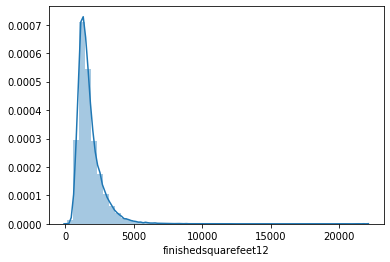

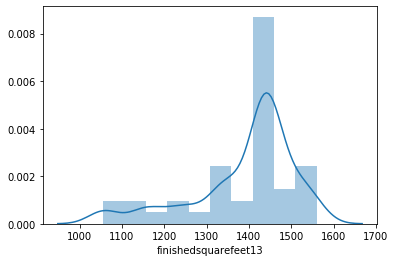

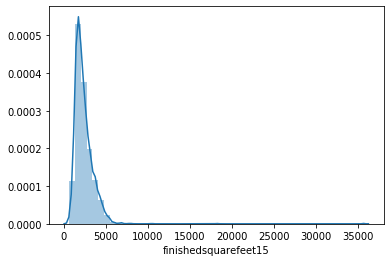

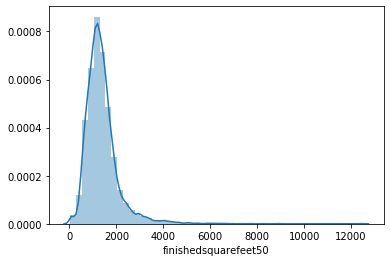

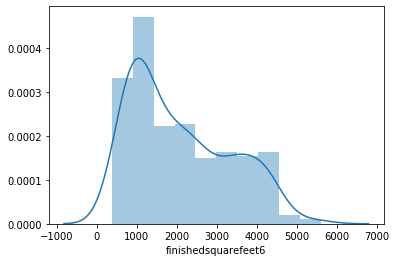

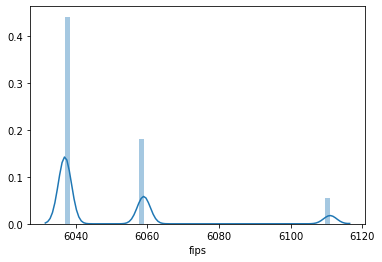

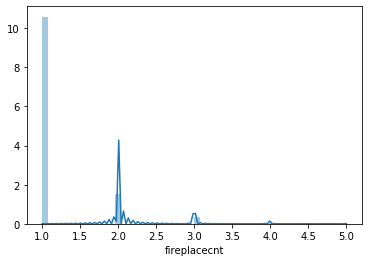

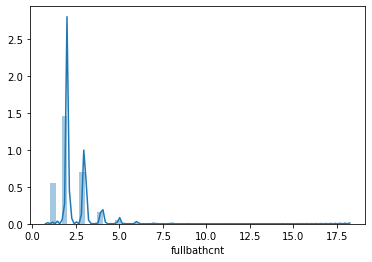

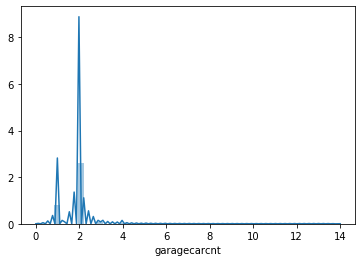

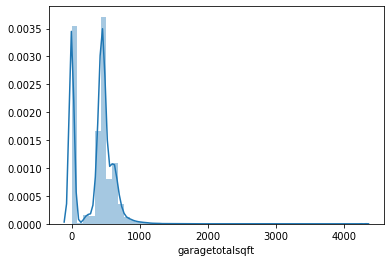

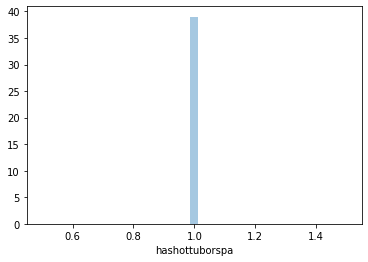

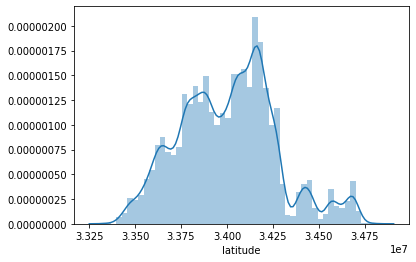

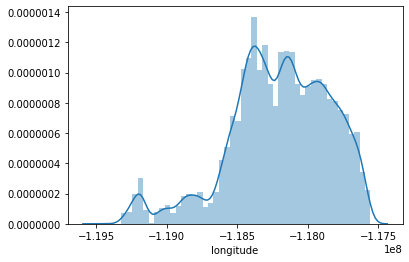

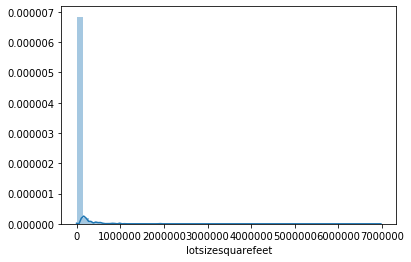

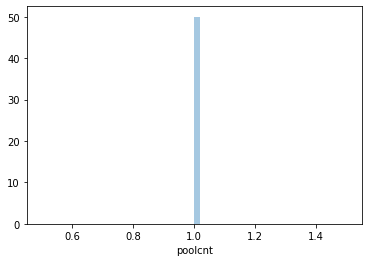

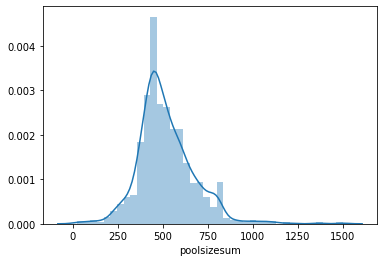

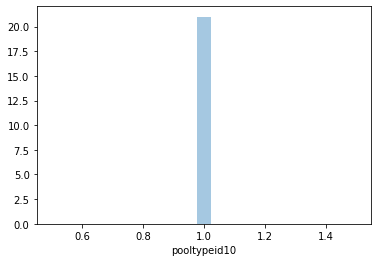

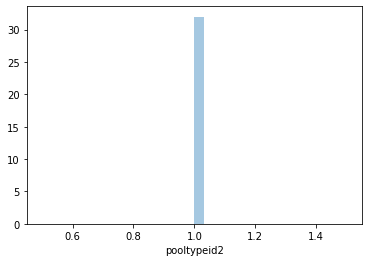

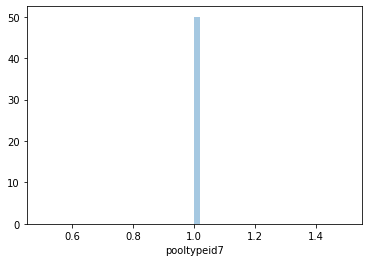

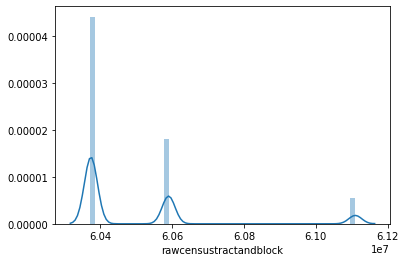

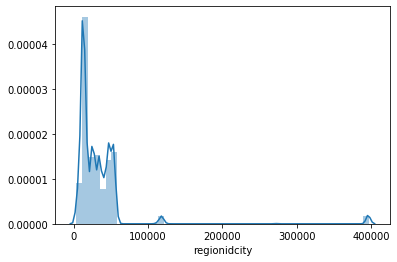

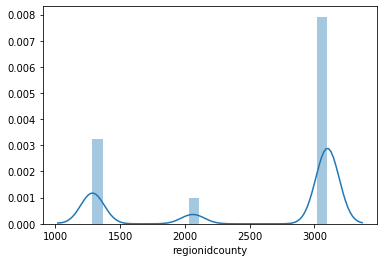

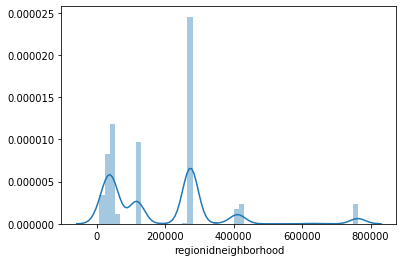

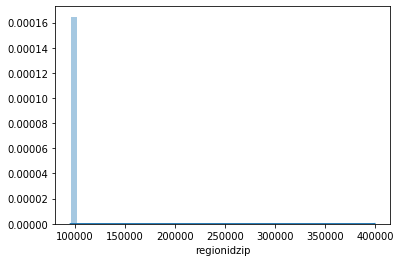

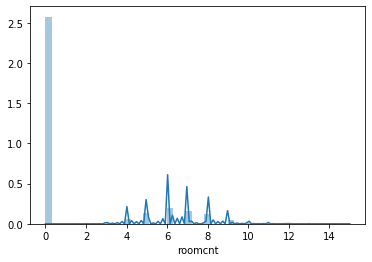

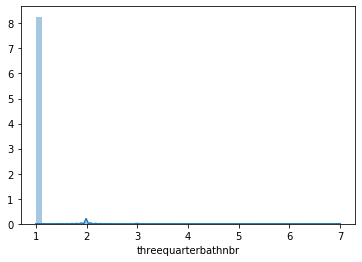

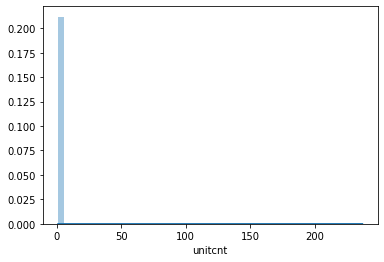

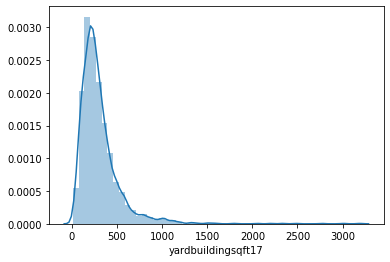

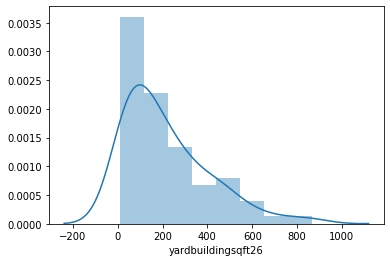

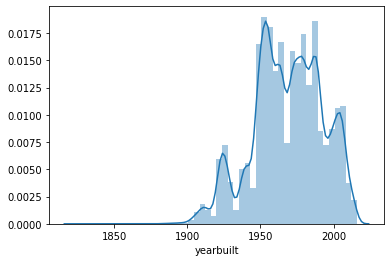

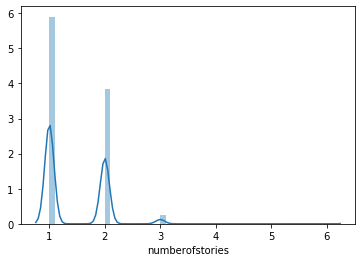

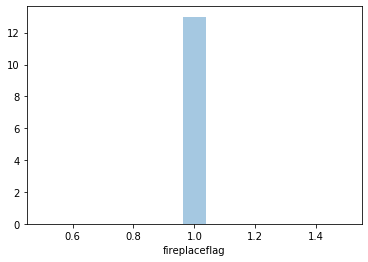

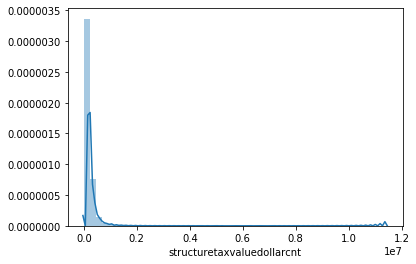

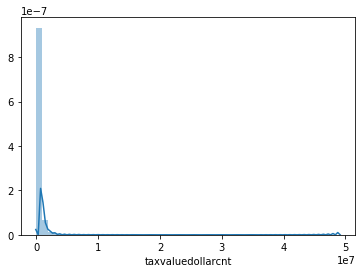

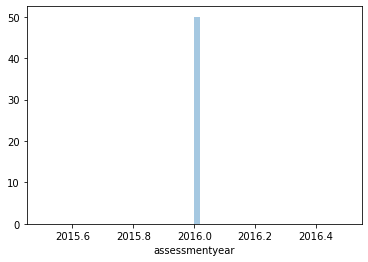

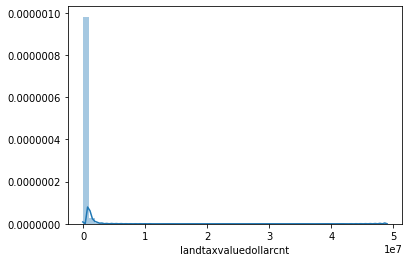

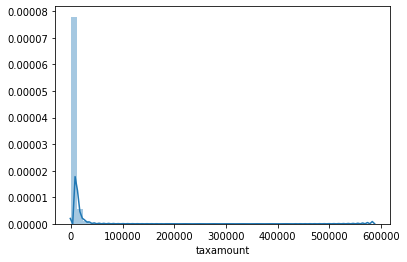

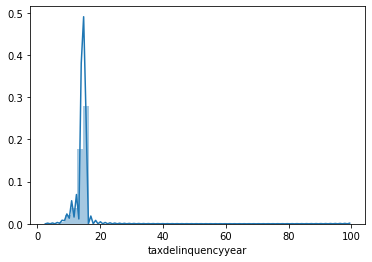

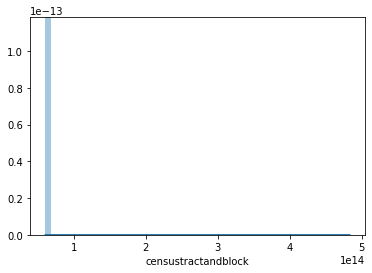

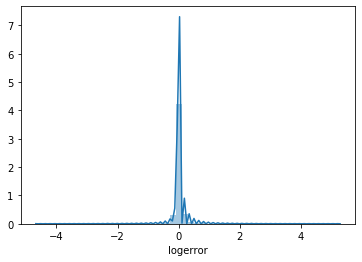

In [42]:
for feature in features_num:
    sns.distplot(df[feature].dropna())
    plt.show()

In [43]:
summarize.df_value_counts(df)

parcelid:
(10554877.537, 26409601.2]    77349
(26409601.2, 42107347.4]          0
(42107347.4, 57805093.6]          0
(57805093.6, 73502839.8]          0
(73502839.8, 89200586.0]          1
(89200586.0, 104898332.2]         1
(104898332.2, 120596078.4]        0
(120596078.4, 136293824.6]        0
(136293824.6, 151991570.8]        0
(151991570.8, 167689317.0]       29
Name: parcelid, dtype: int64
basementsqft:
(34.477000000000004, 390.2]    20
(390.2, 742.4]                 16
(742.4, 1094.6]                 7
(1094.6, 1446.8]                3
(1446.8, 1799.0]                0
(1799.0, 2151.2]                2
(2151.2, 2503.4]                0
(2503.4, 2855.6]                0
(2855.6, 3207.8]                1
(3207.8, 3560.0]                1
Name: basementsqft, dtype: int64
bathroomcnt:
2.0     31484
3.0     17313
1.0     12902
2.5      6604
4.0      3352
1.5      1415
3.5      1034
5.0      1026
4.5       695
0.0       592
6.0       417
5.5       224
7.0       113
8.0       108
6.5  

(11.143, 97.6]    24
(97.6, 183.2]     14
(183.2, 268.8]    10
(268.8, 354.4]     7
(354.4, 440.0]     4
(440.0, 525.6]     6
(525.6, 611.2]     2
(611.2, 696.8]     1
(696.8, 782.4]     1
(782.4, 868.0]     1
Name: yardbuildingsqft26, dtype: int64
yearbuilt:
(1823.807, 1843.2]        1
(1843.2, 1862.4]          0
(1862.4, 1881.6]          3
(1881.6, 1900.8]         90
(1900.8, 1920.0]       1743
(1920.0, 1939.2]       6688
(1939.2, 1958.4]      18463
(1958.4, 1977.6]      20354
(1977.6, 1996.8]      19097
(1996.8, 2016.0]      10678
Name: yearbuilt, dtype: int64
numberofstories:
1.0    10366
2.0     6757
3.0      436
6.0        1
Name: numberofstories, dtype: int64
fireplaceflag:
1.0    172
Name: fireplaceflag, dtype: int64
structuretaxvaluedollarcnt:
(-11377.747, 1142218.6]     76664
(1142218.6, 2284393.2]        493
(2284393.2, 3426567.8]         73
(3426567.8, 4568742.4]         19
(4568742.4, 5710917.0]          9
(5710917.0, 6853091.6]          2
(6853091.6, 7995266.2]          6

Write a function that takes in a dataframe of observations and attributes and returns a df where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [44]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing/rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [45]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

### Prepare

Remove any properties that are likely to be something other than a single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 77578 to 0
Data columns (total 60 columns):
parcelid                        77380 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77380 non-null float64
bedroomcnt                      77380 non-null float64
buildingqualitytypeid           49671 non-null float64
calculatedbathnbr               76771 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77184 non-null float64
finishedsquarefeet12            73748 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50            6023 non-null float64
finishedsquarefeet6             386 non-null float64
fips                            77380 non-null float64
fireplacecnt                    8276 non-null float64
fullbathcnt                

In [47]:
df.propertylandusedesc.value_counts(dropna=False) 

Single Family Residential                     52319
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [48]:
df = df [df.propertylandusedesc == "Single Family Residential"]

In [27]:
df.unitcnt.value_counts(dropna=False)

1.0    33733
NaN    18558
2.0       27
3.0        1
Name: unitcnt, dtype: int64

In [49]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 77578 to 0
Data columns (total 60 columns):
parcelid                        52319 non-null int64
basementsqft                    47 non-null float64
bathroomcnt                     52319 non-null float64
bedroomcnt                      52319 non-null float64
buildingqualitytypeid           33654 non-null float64
calculatedbathnbr               52184 non-null float64
decktypeid                      389 non-null float64
finishedfloor1squarefeet        4371 non-null float64
calculatedfinishedsquarefeet    52238 non-null float64
finishedsquarefeet12            52073 non-null float64
finishedsquarefeet13            0 non-null float64
finishedsquarefeet15            0 non-null float64
finishedsquarefeet50            4371 non-null float64
finishedsquarefeet6             165 non-null float64
fips                            52319 non-null float64
fireplacecnt                    7233 non-null float64
fullbathcnt                    

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - a dataframe
    - a number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing)
    - a number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. i.e. if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing)
- The output:
    - the dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - look up the dropna documentation
    - you will want to compute a threshold from your input values (prop_required) and total number of rows or columns
    - make use of inplace

In [51]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

Decide how to handle the remaining missing values

- fill with constant value
- impute with mean, median, mode
- drop row/column

In [52]:
df.shape

(52319, 60)

In [53]:
nulls_by_col(df)

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
basementsqft,52272,0.999102
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingqualitytypeid,18665,0.356754
calculatedbathnbr,135,0.002580
decktypeid,51930,0.992565
finishedfloor1squarefeet,47948,0.916455
calculatedfinishedsquarefeet,81,0.001548
finishedsquarefeet12,246,0.004702


In [54]:
# remove values that are missing 99% of their values
handle_missing_values(df, .1, .1)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
77578,12826780,2.0,3.0,6.0,2.0,1762.0,1762.0,6037.0,NaN,2.0,...,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,None,Central,Single Family Residential
77577,12773139,1.0,3.0,4.0,1.0,1032.0,1032.0,6037.0,NaN,1.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Central,Single Family Residential
77576,17239384,2.0,4.0,NaN,2.0,1612.0,1612.0,6111.0,1.0,2.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,None,None,Single Family Residential
77575,11000655,2.0,2.0,6.0,2.0,1286.0,1286.0,6037.0,NaN,2.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,None,Central,Single Family Residential
77394,11388980,2.0,3.0,6.0,2.0,1518.0,1518.0,6037.0,NaN,2.0,...,229242.0,2016.0,112345.0,3277.29,6.037703e+13,0.023168,2017-09-19,None,Floor/Wall,Single Family Residential
77388,12247692,2.0,3.0,6.0,2.0,1456.0,1456.0,6037.0,NaN,2.0,...,72444.0,2016.0,30628.0,1121.80,6.037291e+13,0.234104,2017-09-19,None,Floor/Wall,Single Family Residential
77389,11148930,3.0,5.0,7.0,3.0,3208.0,3208.0,6037.0,NaN,3.0,...,484748.0,2016.0,96949.0,6492.47,6.037920e+13,0.055329,2017-09-19,Central,Central,Single Family Residential
77390,11579452,6.0,5.0,11.0,6.0,5280.0,5280.0,6037.0,NaN,6.0,...,4809000.0,2016.0,2996000.0,55446.78,6.037701e+13,0.078915,2017-09-19,Central,Central,Single Family Residential
77391,11704525,2.0,6.0,6.0,2.0,2475.0,2475.0,6037.0,NaN,2.0,...,306636.0,2016.0,56059.0,3874.20,6.037232e+13,0.139631,2017-09-19,None,Central,Single Family Residential
77392,12620810,3.0,4.0,8.0,3.0,2500.0,2500.0,6037.0,NaN,3.0,...,619000.0,2016.0,430300.0,7666.44,6.037544e+13,0.048828,2017-09-19,Central,Central,Single Family Residential


In [55]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,3,7.5,2
1,4,10.0,62
2,5,12.5,2176
3,6,15.0,4148
4,7,17.5,6364
5,8,20.0,17094
6,9,22.5,15411
7,10,25.0,5410
8,11,27.500000000000004,1194
9,12,30.0,265


In [56]:
df.shape

(52319, 40)

In [25]:
df.drop(columns = ["finishedsquarefeet12","pooltypeid7"], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 77578 to 0
Data columns (total 38 columns):
parcelid                        52319 non-null int64
bathroomcnt                     52319 non-null float64
bedroomcnt                      52319 non-null float64
buildingqualitytypeid           33654 non-null float64
calculatedbathnbr               52184 non-null float64
calculatedfinishedsquarefeet    52238 non-null float64
fips                            52319 non-null float64
fireplacecnt                    7233 non-null float64
fullbathcnt                     52184 non-null float64
garagecarcnt                    17984 non-null float64
garagetotalsqft                 17984 non-null float64
latitude                        52319 non-null float64
longitude                       52319 non-null float64
lotsizesquarefeet               51953 non-null float64
poolcnt                         11077 non-null float64
propertycountylandusecode       52319 non-null object
propertyzoningd

In [29]:
df.shape

(52319, 38)

In [61]:
df.buildingqualitytypeid.value_counts(dropna=False)

NaN     18665
6.0     10260
8.0      8222
4.0      8135
7.0      3424
5.0      1507
9.0      1119
11.0      514
10.0      230
3.0       149
12.0       81
1.0         8
2.0         5
Name: buildingqualitytypeid, dtype: int64

In [62]:
df.calculatedbathnbr.value_counts(dropna=False)

2.0     21839
3.0     10650
1.0      9536
2.5      3924
4.0      2225
3.5       916
1.5       832
5.0       803
4.5       686
6.0       320
5.5       223
NaN       135
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
8.5         3
11.0        3
18.0        1
13.0        1
Name: calculatedbathnbr, dtype: int64

In [63]:
df.fireplacecnt.value_counts(dropna=False)

NaN    45086
1.0     6024
2.0      942
3.0      229
4.0       35
5.0        3
Name: fireplacecnt, dtype: int64

In [65]:
df.fireplacecnt.replace(np.nan, 0.0, inplace=True)

In [68]:
df.garagecarcnt.value_counts(dropna=False)

NaN     34335
2.0     14777
1.0      2197
3.0       621
4.0       253
0.0        65
5.0        45
6.0        13
10.0        3
7.0         3
9.0         2
8.0         2
14.0        1
13.0        1
11.0        1
Name: garagecarcnt, dtype: int64

In [75]:
def fill_missing_values(df,fill_value):
    df.fillna(fill_value)
    return df

In [80]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
77578,12826780,2.0,3.0,6.0,2.0,1762.0,1762.0,6037.0,0.0,2.0,...,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,None,Central,Single Family Residential
77577,12773139,1.0,3.0,4.0,1.0,1032.0,1032.0,6037.0,0.0,1.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Central,Single Family Residential
77576,17239384,2.0,4.0,NaN,2.0,1612.0,1612.0,6111.0,1.0,2.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,None,None,Single Family Residential
77575,11000655,2.0,2.0,6.0,2.0,1286.0,1286.0,6037.0,0.0,2.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,None,Central,Single Family Residential
77394,11388980,2.0,3.0,6.0,2.0,1518.0,1518.0,6037.0,0.0,2.0,...,229242.0,2016.0,112345.0,3277.29,6.037703e+13,0.023168,2017-09-19,None,Floor/Wall,Single Family Residential


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 77578 to 0
Data columns (total 40 columns):
parcelid                        52319 non-null int64
bathroomcnt                     52319 non-null float64
bedroomcnt                      52319 non-null float64
buildingqualitytypeid           33654 non-null float64
calculatedbathnbr               52184 non-null float64
calculatedfinishedsquarefeet    52238 non-null float64
finishedsquarefeet12            52073 non-null float64
fips                            52319 non-null float64
fireplacecnt                    52319 non-null float64
fullbathcnt                     52184 non-null float64
garagecarcnt                    17984 non-null float64
garagetotalsqft                 17984 non-null float64
latitude                        52319 non-null float64
longitude                       52319 non-null float64
lotsizesquarefeet               51953 non-null float64
poolcnt                         11077 non-null float64
pooltypeid7  

In [85]:
df.assessmentyear.value_counts(dropna=False)

2016.0    52319
Name: assessmentyear, dtype: int64

In [84]:
df.roomcnt.value_counts()

0.0     37760
6.0      3974
7.0      3608
8.0      2810
5.0      1886
9.0      1173
4.0       518
10.0      338
11.0      108
3.0        79
12.0       35
2.0        12
13.0       10
14.0        6
15.0        1
1.0         1
Name: roomcnt, dtype: int64

In [88]:
df.regionidcounty.value_counts()

3101.0    33823
1286.0    14111
2061.0     4385
Name: regionidcounty, dtype: int64

In [90]:
df.censustractandblock.value_counts()

6.037920e+13    32
6.037920e+13    27
6.059032e+13    24
6.037142e+13    24
6.059032e+13    23
6.059032e+13    23
6.059032e+13    22
6.037194e+13    20
6.037920e+13    20
6.037901e+13    20
6.037236e+13    19
6.037262e+13    19
6.111006e+13    19
6.111006e+13    18
6.059032e+13    18
6.059032e+13    18
6.037920e+13    18
6.059052e+13    18
6.059022e+13    18
6.059042e+13    17
6.059032e+13    17
6.059032e+13    17
6.059052e+13    17
6.059063e+13    17
6.059063e+13    17
6.111008e+13    16
6.037261e+13    16
6.037144e+13    16
6.037911e+13    16
6.037142e+13    16
                ..
6.059100e+13     1
6.111001e+13     1
6.037703e+13     1
6.037181e+13     1
6.037401e+13     1
6.037651e+13     1
6.037621e+13     1
6.037570e+13     1
6.037402e+13     1
6.037901e+13     1
6.037555e+13     1
6.059042e+13     1
6.037291e+13     1
6.037300e+13     1
6.037320e+13     1
6.037101e+13     1
6.037800e+13     1
6.037555e+13     1
6.059032e+13     1
6.037403e+13     1
6.037463e+13     1
6.111005e+13